# Filter the data shared according to the classes in target variable and do the following activities. (Data Set: EcomReviews_8k)

- Create frequency data frame
- Plot word clouds for every class in the target variable using

o bag of words

o tf - idf

o bigrams

o trigrams.

In [72]:
import pandas as pd

In [73]:
data = r"C:\Users\User\Downloads\EcomReviews_8k (1).csv"

In [74]:
df = pd.read_csv(data)
df.head()

,labels,text
0,__label__2,Rose Dawson Malaysia: All must buy the album o...
1,__label__2,a precious resource for Christian contemplatio...
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v..."
3,__label__1,Boring!: This game is based on a great concept...
4,__label__1,Lost in the 70's: The Eurovision song contest ...


In [75]:
import re

In [76]:
def tokenize(text):
    return re.findall(r'\w+',text)

In [77]:
import nltk

In [78]:
stop_words = nltk.corpus.stopwords.words('English')

In [79]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [80]:
def remove_stop(tokens):
    stop_removed_tokens = []
    for t in tokens:
        if t.lower() not in stop_words:
            stop_removed_tokens.append(t)
    return stop_removed_tokens

In [81]:
def prepare(text,pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [82]:
pl = [str.lower,tokenize,remove_stop]

In [83]:
df['tokens'] = df['text'].apply(prepare,pipeline = pl)
df.head()

,labels,text,tokens
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let..."
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,..."
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus..."
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s..."
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go..."


In [84]:
df['num_tokens'] = df['tokens'].apply(len)
df.head()

,labels,text,tokens,num_tokens
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46


In [85]:
df['text_len'] = df['text'].apply(len)
df.head()

,labels,text,tokens,num_tokens,text_len
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511


In [86]:
# Bag of words

In [87]:
tokens = df['tokens'][0]
bow = dict.fromkeys(df['tokens'][0],0)

for i in bow:
    bow[i] = tokens.count(i)

In [88]:
bow

{'rose': 1,
 'dawson': 1,
 'malaysia': 1,
 'must': 1,
 'buy': 1,
 'album': 1,
 'let': 1,
 'talk': 1,
 'love': 1,
 'interesting': 1,
 'information': 1,
 'already': 1,
 'heard': 1,
 'song': 1,
 'heart': 1,
 'go': 1,
 '566': 1,
 'times': 1,
 'believe': 1}

In [89]:
from collections import Counter

In [90]:
counter = Counter(tokens)
print(counter)

Counter({'rose': 1, 'dawson': 1, 'malaysia': 1, 'must': 1, 'buy': 1, 'album': 1, 'let': 1, 'talk': 1, 'love': 1, 'interesting': 1, 'information': 1, 'already': 1, 'heard': 1, 'song': 1, 'heart': 1, 'go': 1, '566': 1, 'times': 1, 'believe': 1})


In [91]:
counter = Counter()
df['tokens'].apply(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7995    None
7996    None
7997    None
7998    None
7999    None
Name: tokens, Length: 8000, dtype: object

In [92]:
counter.most_common(10)

[('book', 4389),
 ('one', 3070),
 ('great', 2379),
 ('good', 2298),
 ('like', 2245),
 ('would', 1826),
 ('read', 1615),
 ('get', 1514),
 ('time', 1491),
 ('really', 1320)]

In [93]:
def count_words (df,columns = 'tokens',preprocess = None,min_freq=2):
    
    def update(doc):  # update function
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
        
    counter = Counter()
    df[columns].apply(update)
    freq_df = pd.DataFrame.from_dict(counter,orient='index',columns=['freq'])  # counter in dictionary coverted in dataframe
    freq_df = freq_df.query('freq>@min_freq')
    freq_df.index.name = 'token'
    return freq_df.sort_values('freq',ascending=False)

In [94]:
freq_df = count_words(df)

In [95]:
freq_df

,freq
token,
book,4389
one,3070
great,2379
good,2298
like,2245
...,...
bouts,3
bossa,3
ankle,3


In [96]:
df['tokens']

0       [rose, dawson, malaysia, must, buy, album, let...
1       [precious, resource, christian, contemplation,...
2       [rename, redsox, yankees, giants, always, trus...
3       [boring, game, based, great, concept, falls, s...
4       [lost, 70, eurovision, song, contest, come, go...
                              ...                        
7995    [helpful, although, gram, index, tone, arm, he...
7996    [scratched, cd, got, cd, played, already, scra...
7997    [words, great, insight, intrigued, title, book...
7998    [get, pay, bought, reading, 2, reviews, ecom, ...
7999    [really, cool, easy, use, third, digital, came...
Name: tokens, Length: 8000, dtype: object

In [ ]:
# remove stop words

In [201]:
preprocess = lambda text:re.findall(r'\w{10,}',text)

In [202]:
freq_df = count_words(df,columns="text",preprocess=preprocess)

In [203]:
freq_df

,freq
token,
characters,404
disappointed,333
interesting,273
information,268
understand,212
...,...
temporarily,3
screeching,3
transferring,3


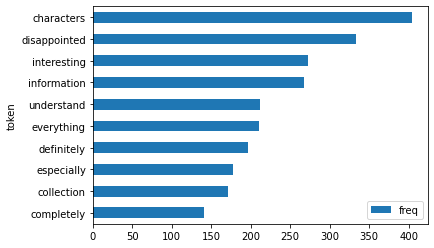

In [204]:
ax=freq_df.head(10).plot(kind='barh')
ax.invert_yaxis()

In [103]:
# word clouds

In [104]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

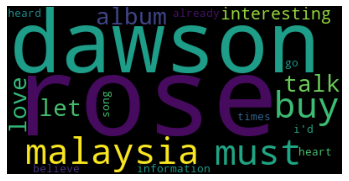

In [105]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df.query("labels=='__label__2'")['text'].values[0].lower()
wc = WordCloud(max_words = 100, stopwords=stop_words)
wc.generate(text)
ax = plt.imshow(wc)
ax = plt.axis("off")

In [161]:
def wordcloud(word_freq,title = None,max_words=200,stopwords=None):
    wc = WordCloud(max_words=max_words, stopwords=stop_words)
    
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
        
    else:
        counter=word_freq

    if stopwords is not None:
        counter = {token:freq for(token,freq) in counter.items() if token not in stopwords}
    wc.generate_from_frequencies(counter)
    ax=plt.imshow(wc)
    ax=plt.axis("off")

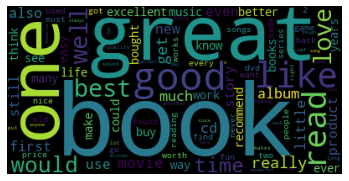

In [107]:
freq___label__2_df = count_words(df[df['labels']=='__label__2'])
plt.figure()
wordcloud(freq___label__2_df['freq'], max_words=100)

In [108]:
freq___label__2_df

,freq
token,
book,2221
great,1841
one,1529
good,1325
like,1078
...,...
polish,3
trucks,3
preschoolers,3


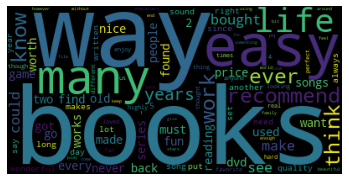

In [109]:
wordcloud(freq___label__2_df['freq'],max_words=100,stopwords=freq___label__2_df.head(30).index)

In [110]:
 #tf - idf

In [111]:
import numpy as np

In [209]:
def compute_idf(df,column='tokens',preprocess=None,min_df=2):
    def update(doc):
        tokens=doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter=Counter()
    df[column].apply(update)
    
    idf_df=pd.DataFrame.from_dict(counter,orient='index',columns=['df'])
    idf_df=idf_df.query('df>@min_df')
    idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1
    freq_df.index.name='token'
    return idf_df

In [210]:
idf_df = compute_idf(df)

C:\Users\User\AppData\Local\Temp\ipykernel_5008\1542347056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1


In [211]:
idf_df

,df,idf
album,406,3.080844
must,378,3.152303
go,527,2.819996
already,211,3.735339
rose,14,6.448139
...,...,...
fabulously,3,7.988585
latte,3,7.988585
tai,3,7.988585
unlucky,3,7.988585


In [212]:
idf_df.sort_values('idf',ascending=False)

,df,idf
retriever,3,7.988585
penn,3,7.988585
karate,3,7.988585
guessed,3,7.988585
di,3,7.988585
...,...,...
like,1704,1.646463
good,1749,1.620397
great,1769,1.609027
book,2049,1.462090


In [213]:
freq_df['tfidf'] = freq_df['freq']*idf_df['idf']
freq_df.sort_values(by='tfidf')

,freq,tfidf
token,,
christians,3,18.761950
curriculum,3,21.886312
undoubtedly,3,21.886312
coffeemaker,3,22.433277
enthusiast,3,22.433277
...,...,...
objectives,3,NaN
Unbelievably,3,NaN
toothpaste,3,NaN


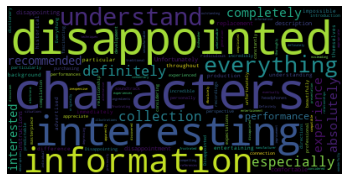

In [214]:
freq___label__1_df = count_words(df[df['labels']=='__label__1'])
freq___label__2_df = count_words(df[df['labels']=='__label__2'])


freq___label__1_df['tfidf'] = freq___label__1_df['freq']*idf_df['idf']
freq___label__2_df['tfidf'] = freq___label__2_df['freq']*idf_df['idf']

wordcloud(freq_df['freq'],title='All labels')

In [215]:
# Bigrams

In [216]:
def ngrams(tokens, n=2, sep=' ',stopwords=stop_words):
    return[sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)]) if len([t for t in ngram if t in stop_words])==0]

In [217]:
df['bigrams'] = df['text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=2,stopwords=stop_words)

In [218]:
df.loc[0:5,'text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=2,stopwords=stop_words)

0    [rose dawson, dawson malaysia, must buy, alrea...
1    [precious resource, christian contemplation, b...
2    [redsox yankees, always trusted, trusted ken, ...
3    [great concept, falls short, really bad, contr...
4    [eurovision song, song contest, good songs, so...
5    [joan hart, acting drives, crazy melissa, meli...
Name: text, dtype: object

In [219]:
df

,labels,text,tokens,num_tokens,text_len,bigrams,trigrams
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205,"[rose dawson, dawson malaysia, must buy, alrea...","[rose dawson, dawson malaysia, must buy, alrea..."
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655,"[precious resource, christian contemplation, b...","[precious resource, christian contemplation, b..."
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660,"[redsox yankees, always trusted, trusted ken, ...","[redsox yankees, always trusted, trusted ken, ..."
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256,"[great concept, falls short, really bad, contr...","[great concept, falls short, really bad, contr..."
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511,"[eurovision song, song contest, good songs, so...","[eurovision song, song contest, good songs, so..."
...,...,...,...,...,...,...,...
7995,__label__2,Very Helpful: Although I have a gram index on ...,"[helpful, although, gram, index, tone, arm, he...",11,121,"[helpful although, gram index, tone arm, stylu...","[helpful although, gram index, tone arm, stylu..."
7996,__label__1,Scratched up cd: When I got this cd and played...,"[scratched, cd, got, cd, played, already, scra...",13,132,"[already scrached, tryed playing, songs wouldn...","[already scrached, tryed playing, songs wouldn..."
7997,__label__2,"...in a few words, But Great Insight!: I was i...","[words, great, insight, intrigued, title, book...",37,435,"[great insight, cool breeze, summer day, veter...","[great insight, cool breeze, summer day, veter..."
7998,__label__1,You get what you pay for: I bought this after ...,"[get, pay, bought, reading, 2, reviews, ecom, ...",30,299,"[reading 2, 2 reviews, skipped cds, 4 months, ...","[reading 2, 2 reviews, skipped cds, 4 months, ..."


In [220]:
idf_df_bigram = compute_idf(df,column = 'bigrams',min_df=10)

C:\Users\User\AppData\Local\Temp\ipykernel_5008\1542347056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1


In [221]:
idf_df_bigram

,df,idf
must buy,15,6.379147
right away,21,6.042674
years ago,98,4.502229
two years,23,5.951703
ever read,64,4.928314
...,...,...
went back,14,6.448139
r b,11,6.689302
product description,14,6.448139
something new,11,6.689302


In [222]:
freq_df___label__2_bigrams = count_words(df[df['labels']=='__label__2'],columns='bigrams')

In [223]:
freq_df___label__2_bigrams

,freq
token,
highly recommend,115
year old,106
great book,97
well written,79
would recommend,73
...,...
many uses,3
quality sound,3
engaging read,3


In [224]:
freq_df___label__2_bigrams['tfidf'] = freq_df___label__2_bigrams['freq']*idf_df_bigram['idf']

In [225]:
freq_df___label__2_bigrams

,freq,tfidf
token,,
highly recommend,115,487.044154
year old,106,433.538362
great book,97,436.716246
well written,79,362.403585
would recommend,73,334.072624
...,...,...
many uses,3,NaN
quality sound,3,NaN
engaging read,3,NaN


In [226]:
# trigrams

In [227]:
df['trigrams'] = df['text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=2,stopwords=stop_words)

In [228]:
df.loc[0:5,'text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=3,stopwords=stop_words)

0            [rose dawson malaysia, 566 times believe]
1    [love without soft, without soft pedalling, bu...
2    [always trusted ken, trusted ken burns, good f...
3    [control options pass, roller coaster tycoon, ...
4    [eurovision song contest, song everyone knows,...
5    [crazy melissa joan, melissa joan hart, donkey...
Name: text, dtype: object

In [229]:
df

,labels,text,tokens,num_tokens,text_len,bigrams,trigrams
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205,"[rose dawson, dawson malaysia, must buy, alrea...","[rose dawson, dawson malaysia, must buy, alrea..."
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655,"[precious resource, christian contemplation, b...","[precious resource, christian contemplation, b..."
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660,"[redsox yankees, always trusted, trusted ken, ...","[redsox yankees, always trusted, trusted ken, ..."
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256,"[great concept, falls short, really bad, contr...","[great concept, falls short, really bad, contr..."
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511,"[eurovision song, song contest, good songs, so...","[eurovision song, song contest, good songs, so..."
...,...,...,...,...,...,...,...
7995,__label__2,Very Helpful: Although I have a gram index on ...,"[helpful, although, gram, index, tone, arm, he...",11,121,"[helpful although, gram index, tone arm, stylu...","[helpful although, gram index, tone arm, stylu..."
7996,__label__1,Scratched up cd: When I got this cd and played...,"[scratched, cd, got, cd, played, already, scra...",13,132,"[already scrached, tryed playing, songs wouldn...","[already scrached, tryed playing, songs wouldn..."
7997,__label__2,"...in a few words, But Great Insight!: I was i...","[words, great, insight, intrigued, title, book...",37,435,"[great insight, cool breeze, summer day, veter...","[great insight, cool breeze, summer day, veter..."
7998,__label__1,You get what you pay for: I bought this after ...,"[get, pay, bought, reading, 2, reviews, ecom, ...",30,299,"[reading 2, 2 reviews, skipped cds, 4 months, ...","[reading 2, 2 reviews, skipped cds, 4 months, ..."


In [230]:
idf_df_trigrams = compute_idf(df,column = 'trigrams',min_df=10)

C:\Users\User\AppData\Local\Temp\ipykernel_5008\1542347056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1


In [231]:
idf_df_trigrams

,df,idf
must buy,15,6.379147
right away,21,6.042674
years ago,98,4.502229
two years,23,5.951703
ever read,64,4.928314
...,...,...
went back,14,6.448139
r b,11,6.689302
product description,14,6.448139
something new,11,6.689302


In [232]:
freq_df___label__2_trigrams = count_words(df[df['labels']=='__label__2'],columns='trigrams')

In [233]:
freq_df___label__2_trigrams

,freq
token,
highly recommend,115
year old,106
great book,97
well written,79
would recommend,73
...,...
many uses,3
quality sound,3
engaging read,3


In [234]:
freq_df___label__2_trigrams['tfidf'] = freq_df___label__2_trigrams['freq']*idf_df_trigrams['idf']

In [235]:
freq_df___label__2_trigrams

,freq,tfidf
token,,
highly recommend,115,487.044154
year old,106,433.538362
great book,97,436.716246
well written,79,362.403585
would recommend,73,334.072624
...,...,...
many uses,3,NaN
quality sound,3,NaN
engaging read,3,NaN


# concate bigrams and trigrams

In [236]:
freq_df___label__2_ngrams = pd.concat([freq___label__2_df,freq_df___label__2_bigrams,freq_df___label__2_trigrams])

In [237]:
freq_df___label__2_ngrams

,freq,tfidf
token,,
book,2221,3247.301162
great,1841,2962.218940
one,1529,2072.872626
good,1325,2147.026483
like,1078,1774.887236
...,...,...
many uses,3,NaN
quality sound,3,NaN
engaging read,3,NaN


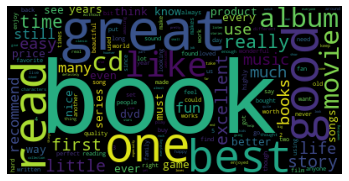

In [239]:
wordcloud(freq_df___label__2_ngrams['tfidf'],title='TF-IDF', stopwords = ['love','also','get','well','new','would'])